
# Assignment 2 for Course 1MS041
Make sure you pass the `# ... Test` cells and
 submit your solution notebook in the corresponding assignment on the course website. You can submit multiple times before the deadline and your highest score will be used.

---
## Assignment 2, PROBLEM 1
Maximum Points = 8


A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [1.5p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [1.5p]
3. Is this Markov chain irreducible? [1.5p]
4. What is the stationary distribution? [1.5p]
5. Advanced question: What is the expected number of steps until the first time one enters the downtown region having started in the suburbs region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. [2p]



In [1]:
import numpy as np

# Transition matrix
P = np.array([
    [0.3, 0.4, 0.3],
    [0.2, 0.5, 0.3],
    [0.4, 0.3, 0.3]
])

# Initial state (start in state 2)
pi_0 = np.array([0, 1, 0])

pi_2 = pi_0 @ np.linalg.matrix_power(P, 2)

# Fill in the answer to part 1 below as a decimal number
problem1_p1 = pi_2[0]

In [2]:
# Part 2

prob = P[1,1]*P[1,0] + P[1,2]*P[2,0]
print(prob)
# Fill in the answer to part 2 below as a decimal number
problem1_p2 = prob

0.22


In [3]:
# Part 3

# Fill in the answer to part 3 below as a boolean
problem1_irreducible = True

In [4]:
# Part 4
# pi = piP => P^T pi^T = pi^T

# Compute eigenvalues and eigenvectors of P^T
eigvals, eigvecs = np.linalg.eig(P.T)

# Find the index of eigenvalue 1 as the eigenvalue 1 corresponds to the stationary distribution
index = np.isclose(eigvals, 1)

# Get corresponding eigenvector
pi = np.real(eigvecs[:, index]).flatten()

# Normalize to sum to 1
pi = pi / pi.sum()

print(pi)


# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
problem1_stationary = pi

[0.28888889 0.41111111 0.3       ]


In [5]:
# Part 5
target = 0 # Downtown Region
state = 1 # Suburbs
max_steps = 30

f = np.zeros(max_steps + 1) # f[n], the probability that the first visit to Downtown happens exactly at step n 
current = np.zeros(3) # Current distribution over all states at a given step
current[state] = 1 # Initialy the truc is in the Suburbs

for n in range(1, max_steps + 1):
    current = current @ P # The new distribution after one time step
    f[n] = current[target] # Probability of being in Downtown
    current[target] = 0 # Reset as we ar looking for first hit

expected_time = sum(n * f[n] for n in range(1, max_steps+1))
print(expected_time)

# Fill in the answer to part 5 below
# That is, the expected number of steps as a decimal number
problem1_ET = expected_time

3.8444520365145998


In [6]:
# ASSIGNMENT 2, TEST 1, POINTS 8

Beginning tests for problem 1

---------------------------------
Beginning test for part1
---------------------------------

-----Beginning test------
Your probability is correct!
-----Ending test---------

---------------------------------
Beginning test for part2
---------------------------------

-----Beginning test------
Your probability is correct!
-----Ending test---------

---------------------------------
Beginning test for part3
---------------------------------

-----Beginning test------
Your answer is correct
-----Ending test---------

---------------------------------
Beginning test for part4
---------------------------------

-----Beginning test------
Your stationary distribution is within distance 0.01 from the true stationary distribution
-----Ending test---------

---------------------------------
Beginning test for part5
---------------------------------

-----Beginning test------
You are within 0.05 from the true answer, good!
-----Ending test---------


All tests com

---
## Assignment 2, PROBLEM 2
Maximum Points = 4


Use the **Multi-dimensional Constrained Optimisation** example (in `07-Optimization.ipynb`) to numerically find the MLe for the mean and variance parameter based on `normallySimulatedDataSamples`, an array obtained by a specific simulation of $30$ IID samples from the $Normal(10,2)$ random variable.

Recall that $Normal(\mu, \sigma^2)$ RV has the probability density function given by:

$$
f(x ;\mu, \sigma) = \displaystyle\frac{1}{\sigma\sqrt{2\pi}}\exp\left(\frac{-1}{2\sigma^2}(x-\mu)^2\right)
$$

The two parameters, $\mu \in \mathbb{R} := (-\infty,\infty)$ and $\sigma \in (0,\infty)$, are sometimes referred to as the location and scale parameters.

You know that the log likelihood function for $n$ IID samples from a Normal RV with parameters $\mu$ and $\sigma$ simply follows from $\sum_{i=1}^n \log(f(x_i; \mu,\sigma))$, based on the IID assumption. 

NOTE: When setting bounding boxes for $\mu$ and $\sigma$ try to start with some guesses like $[-20,20]$ and $[0.1,5.0]$ and make it larger if the solution is at the boundary. Making the left bounding-point for $\sigma$ too close to $0.0$ will cause division by zero Warnings. Other numerical instabilities can happen in such iterative numerical solutions to the MLe. You need to be patient and learn by trial-and-error. You will see the mathematical theory in more details in a future course in scientific computing/optimisation. So don't worry too much now except learning to use it for our problems.  

In [7]:

import numpy as np
from scipy import optimize
# do NOT change the next three lines
np.random.seed(123456) # set seed
# simulate 30 IID samples drawn from Normal(10,2)RV
normallySimulatedDataSamples = np.random.normal(10,2,30) 

# define the negative log likelihoo function you want to minimise by editing XXX
def negLogLklOfIIDNormalSamples(parameters):
    '''return the -log(likelihood) of normallySimulatedDataSamples with mean and var parameters'''
    mu_param=parameters[0]
    sigma_param=parameters[1]
    n = len(normallySimulatedDataSamples)
    
    result = n*np.log(sigma_param*np.sqrt(2*np.pi)) + np.sum(((normallySimulatedDataSamples - mu_param)**2) / (2*sigma_param**2))
    return result

# you should only change XXX below and not anything else
parameter_bounding_box=((-20, 20), (0.1, 5.0)) # specify the constraints for each parameter - some guess work...
initial_arguments = np.array([5, 1]) # point in 2D to initialise the minimize algorithm
result_problem2_opt = optimize.minimize(negLogLklOfIIDNormalSamples, initial_arguments, bounds=parameter_bounding_box)
# call the minimize method above finally! you need to play a bit to get initial conditions and bounding box ok
result_problem2_opt


      fun: 58.6313872823868
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.35003109e-05, -2.13162822e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 63
      nit: 14
     njev: 21
   status: 0
  success: True
        x: array([9.26862095, 1.70820045])

In [8]:
# ASSIGNMENT 2, TEST 2, POINTS 4

Beginning tests for problem 2

---------------------------------
Beginning test for part1
---------------------------------

-----Beginning test------
Your negative log likelihood is correct on the first hidden test sample
-----Ending test---------

-----Beginning test------
Your negative log likelihood is correct on the second hidden test sample
-----Ending test---------

---------------------------------
Beginning test for part2
---------------------------------

-----Beginning test------
Your optimization converged
-----Ending test---------

-----Beginning test------
Your MLE for the mean is correct
-----Ending test---------

-----Beginning test------
Your MLE for the variance is correct
-----Ending test---------


All tests complete, you got = 4 points
The number of points you have scored for this problem is 4 out of 4
The number of points you have accumulated thus far is   12 out of 12


---
## Assignment 2, PROBLEM 3
Maximum Points = 4



Derive the maximum likelihood estimate for $n$ IID samples from a random variable with the following probability density function:
$$
f(x; \lambda) = \frac{1}{24} \lambda^5 x^4 \exp(-\lambda x), \qquad \text{ where, } \lambda>0, x > 0
$$

You can solve the MLe by hand (using pencil paper or using key-strokes). Present your solution as the return value of a function called `def MLeForAssignment2Problem3(x)`, where `x` is a list of $n$ input data points.

In [9]:

# do not change the name of the function, just replace XXX with the appropriate expressions for the MLe
def MLeForAssignment2Problem3(x):
    '''Computes the MLe of lambda for n input data points'''
    n = len(x)
    lambda_hat = 5 * n / sum(x)
    return lambda_hat

In [10]:
# ASSIGNMENT 2, TEST 2, POINTS 4

Beginning tests for problem 2

---------------------------------
Beginning test for part1
---------------------------------

-----Beginning test------
Your MLE is correct on a hidden test sample
-----Ending test---------

---------------------------------
Beginning test for part2
---------------------------------

-----Beginning test------
Your MLE is correct on a hidden test sample
-----Ending test---------


All tests complete, you got = 4 points
The number of points you have scored for this problem is 4 out of 4
The number of points you have accumulated thus far is   16 out of 16


---
## Assignment 2, PROBLEM 4
Maximum Points = 8


## Random variable generation and transformation

The purpose of this problem is to show that you can implement your own sampler, this will be built in the following three steps:

1. [2p] Implement a Linear Congruential Generator where you tested out a good combination (a large $M$ with $a,b$ satisfying the Hull-Dobell (Thm 6.8)) of parameters. Follow the instructions in the code block.
2. [2p] Using a generator construct random numbers from the uniform $[0,1]$ distribution.
3. [4p] Using a uniform $[0,1]$ random generator, generate samples from 

$$p_0(x) = \frac{\pi}{2}|\sin(2\pi x)|, \quad x \in [0,1] \enspace .$$

Using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) with sampling density given by the uniform $[0,1]$ distribution.

In [11]:

def problem4_LCG(size=None, seed = 0):
    """
    A linear congruential generator that generates pseudo random numbers according to size.
    
    Parameters
    -------------
    size : an integer denoting how many samples should be produced
    seed : the starting point of the LCG, i.e. u0 in the notes.
    
    Returns
    -------------
    out : a list of the pseudo random numbers
    """
    
    m = 2*31
    a = 1103515245
    c = 12345
    
    out = []
    x = seed
    for _ in range(size):
        x = (a * x + c) % m
        out.append(x)
    
    return out

In [12]:

def problem4_uniform(generator=None, period = 1, size=None, seed=0):
    """
    Takes a generator and produces samples from the uniform [0,1] distribution according
    to size.
    
    Parameters
    -------------
    generator : a function of type generator(size,seed) and produces the same result as problem1_LCG, i.e. pseudo random numbers in the range {0,1,...,period-1}
    period : the period of the generator
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    
    Returns
    --------------
    out : a list of the uniform pseudo random numbers
    """
    
    generated_values = generator(size, seed)
    uniform_samples = [x / period for x in generated_values]
    return uniform_samples

In [13]:

import math


def problem4_accept_reject(uniformGenerator=None, n_iterations=None, seed=0):
    """
    Takes a generator that produces uniform pseudo random [0,1] numbers 
    and produces samples from (pi/2)*abs(sin(x*2*pi)) using an Accept-Reject
    sampler with the uniform distribution as the proposal distribution.
    Runs n_iterations
    
    Parameters
    -------------
    generator : a function of the type generator(size,seed) that produces uniform pseudo random
    numbers from [0,1]
    seed : the seed to be used in the generator provided
    n_iterations : an integer denoting how many attempts should be made in the accept-reject sampler
    
    Returns
    --------------
    out : a list of the pseudo random numbers with the specified distribution
    """
    
    out = []
    current_seed = seed
    for _ in range(n_iterations):
        x = uniformGenerator(size=1, seed=current_seed)[0] # sample x from g
        current_seed += 1
        
        accept_prob = abs(math.sin(2 * math.pi * x)) # r(x) = f(x) / Mg(x)
 
        u = uniformGenerator(size=1, seed=current_seed)[0] # draw U
        current_seed += 1

        
        if u <= accept_prob: #  Accept if U <= r(x)
            out.append(x)
    
    return out

---
#### Local Test for Assignment 2, PROBLEM 4
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [14]:

# If you managed to solve all three parts you can test the following code to see if it runs
# you have to change the period to match your LCG though, this is marked as XXX.
# It is a very good idea to check these things using the histogram function in sagemath
# try with a larger number of samples, up to 10000 should run

print("LCG output: %s" % problem4_LCG(size=10, seed = 1))

period = 2**32

print("Uniform sampler %s" % problem4_uniform(generator=problem4_LCG, period = period, size=10, seed=1))

uniform_sampler = lambda size,seed: problem4_uniform(generator=problem4_LCG, period = period, size=size, seed=seed)

print("Accept-Reject sampler %s" % problem4_accept_reject(uniformGenerator = uniform_sampler,n_iterations=20,seed=1))

LCG output: [6, 1, 6, 1, 6, 1, 6, 1, 6, 1]
Uniform sampler [1.3969838619232178e-09, 2.3283064365386963e-10, 1.3969838619232178e-09, 2.3283064365386963e-10, 1.3969838619232178e-09, 2.3283064365386963e-10, 1.3969838619232178e-09, 2.3283064365386963e-10, 1.3969838619232178e-09, 2.3283064365386963e-10]
Accept-Reject sampler [1.3969838619232178e-09, 9.313225746154785e-10, 4.656612873077393e-10, 1.3969838619232178e-08, 1.3504177331924438e-08, 1.30385160446167e-08, 1.257285475730896e-08, 1.210719347000122e-08, 1.1641532182693481e-08, 1.1175870895385742e-08, 1.0710209608078003e-08, 1.0244548320770264e-08, 9.778887033462524e-09, 9.313225746154785e-09, 8.847564458847046e-09, 8.381903171539307e-09, 7.916241884231567e-09, 7.450580596923828e-09, 6.984919309616089e-09]


In [15]:

# If however you did not manage to implement either part 1 or part 2 but still want to check part 3, you can run the code below

def testUniformGenerator(size,seed):
    import random
    random.seed(seed)
    
    return [random.uniform(0,1) for s in range(size)]

print("Accept-Reject sampler %s" % problem4_accept_reject(uniformGenerator=testUniformGenerator, n_iterations=20, seed=1))

Accept-Reject sampler [0.23796462709189137, 0.32383276483316237, 0.2590084917154736, 0.6484972199788831, 0.6820045605879779, 0.20985124453651727]


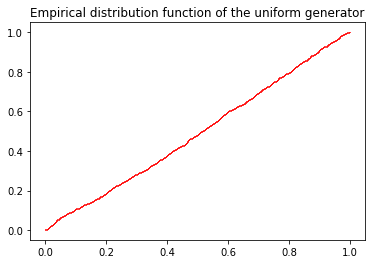

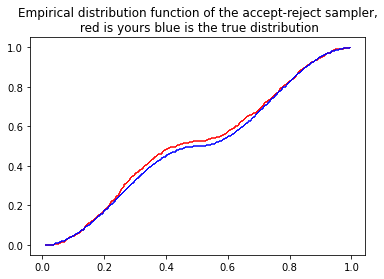

Beginning tests for problem 3

---------------------------------
Beginning test for part1
---------------------------------

-----Beginning test------
LCG outputs correct size
-----Ending test---------

-----Beginning test------

Your period is less than 1000, which is not a good pseudo random generator
You got 1.0 points deduction 
-----Ending test---------

---------------------------------
Beginning test for part2
---------------------------------

-----Beginning test------
problem4_uniform outputs correct size
-----Ending test---------

-----Beginning test------
The uniform sampler seems to produce the correct distribution, within tolerance!
-----Ending test---------

-----Beginning test------
The output of problem4_uniform is greater than 0
-----Ending test---------

-----Beginning test------
The output of problem4_uniform is less than 1
-----Ending test---------

---------------------------------
Beginning test for part3
---------------------------------

-----Beginning test-----

In [16]:
# ASSIGNMENT 2, TEST 4, POINTS 8

The number of points you have scored in total for this entire set of Problems is 22 out of 24.